In [3]:
import pandas as pd
df= pd.DataFrame()

In [7]:
df = pd.read_csv("/content/Alcohol_Sales.csv", index_col="DATE", parse_dates=True)
df.index.freq = "MS"

In [6]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<Axes: xlabel='DATE'>

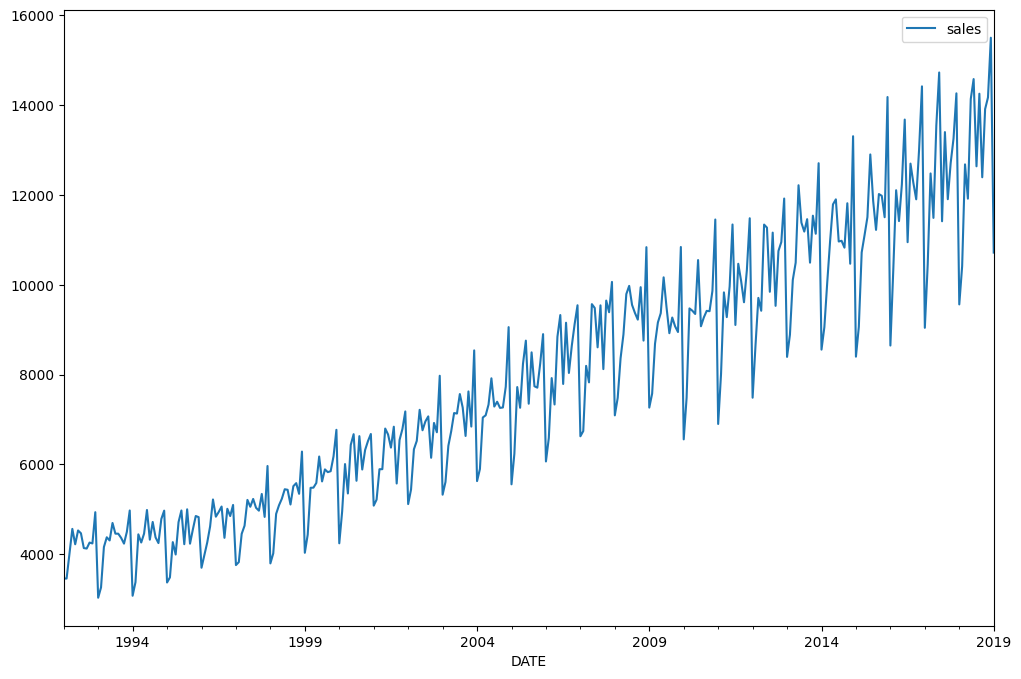

In [9]:
df.columns = ['sales']
df.plot(figsize=(12,8))

In [11]:
df["sales_LastMonth"] = df['sales'].shift(+1)
df['sales_2MonthsBack'] = df['sales'].shift(+2)
df['sales_3MonthsBack'] = df['sales'].shift(+3)
df
# Create new columns for sales from previous months by shifting the 'sales' column:

,sales,sales_LastMonth,sales_2MonthsBack,sales_3MonthsBack
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,3459.0,NaN,NaN
1992-03-01,4002,3458.0,3459.0,NaN
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [12]:
df = df.dropna()
df

,sales,sales_LastMonth,sales_2MonthsBack,sales_3MonthsBack
DATE,,,,
1992-04-01,4564,4002.0,3458.0,3459.0
1992-05-01,4221,4564.0,4002.0,3458.0
1992-06-01,4529,4221.0,4564.0,4002.0
1992-07-01,4466,4529.0,4221.0,4564.0
1992-08-01,4137,4466.0,4529.0,4221.0
...,...,...,...,...
2018-09-01,12396,14257.0,12640.0,14583.0
2018-10-01,13914,12396.0,14257.0,12640.0
2018-11-01,14174,13914.0,12396.0,14257.0


In [13]:
from sklearn.linear_model import LinearRegression
l_model = LinearRegression()

In [15]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=100, max_features=3, random_state=1)


In [16]:
import numpy as np
x1,x2,x3,y = df['sales_LastMonth'], df['sales_2MonthsBack'], df['sales_3MonthsBack'], df['sales']
x1,x2,x3,y = np.array(x1), np.array(x2), np.array(x3), np.array(y)
x1,x2,x3,y = x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), y.reshape(-1,1)
final_X= np.concatenate((x1,x2,x3), axis=1)
print(final_X)

[[ 4002.  3458.  3459.]
 [ 4564.  4002.  3458.]
 [ 4221.  4564.  4002.]
 [ 4529.  4221.  4564.]
 [ 4466.  4529.  4221.]
 [ 4137.  4466.  4529.]
 [ 4126.  4137.  4466.]
 [ 4259.  4126.  4137.]
 [ 4240.  4259.  4126.]
 [ 4936.  4240.  4259.]
 [ 3031.  4936.  4240.]
 [ 3261.  3031.  4936.]
 [ 4160.  3261.  3031.]
 [ 4377.  4160.  3261.]
 [ 4307.  4377.  4160.]
 [ 4696.  4307.  4377.]
 [ 4458.  4696.  4307.]
 [ 4457.  4458.  4696.]
 [ 4364.  4457.  4458.]
 [ 4236.  4364.  4457.]
 [ 4500.  4236.  4364.]
 [ 4974.  4500.  4236.]
 [ 3075.  4974.  4500.]
 [ 3377.  3075.  4974.]
 [ 4443.  3377.  3075.]
 [ 4261.  4443.  3377.]
 [ 4460.  4261.  4443.]
 [ 4985.  4460.  4261.]
 [ 4324.  4985.  4460.]
 [ 4719.  4324.  4985.]
 [ 4374.  4719.  4324.]
 [ 4248.  4374.  4719.]
 [ 4784.  4248.  4374.]
 [ 4971.  4784.  4248.]
 [ 3370.  4971.  4784.]
 [ 3484.  3370.  4971.]
 [ 4269.  3484.  3370.]
 [ 3994.  4269.  3484.]
 [ 4715.  3994.  4269.]
 [ 4974.  4715.  3994.]
 [ 4223.  4974.  4715.]
 [ 5000.  4223. 

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = final_X[:-30],final_X[-30:], y[:-30],y[-30:]

In [49]:
y_train = y_train.ravel()
model.fit(x_train,y_train)
l_model.fit(x_train, y_train)

#model.fit method expects a 1D array for the target variable y_train, but it's currently a 2D column vector.
#Reshape y_train into a 1D array using y_train.ravel()

LinearRegression()

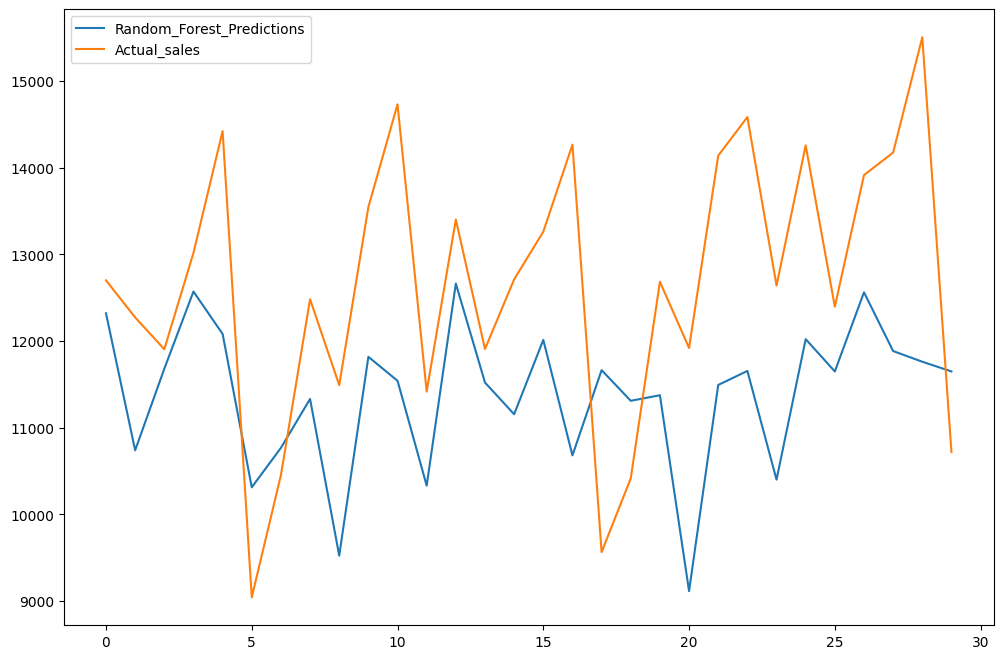

In [50]:
pred= model.predict(x_test)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(pred, label = "Random_Forest_Predictions")
plt.plot(y_test, label="Actual_sales")
plt.legend(loc="upper left")
plt.show()

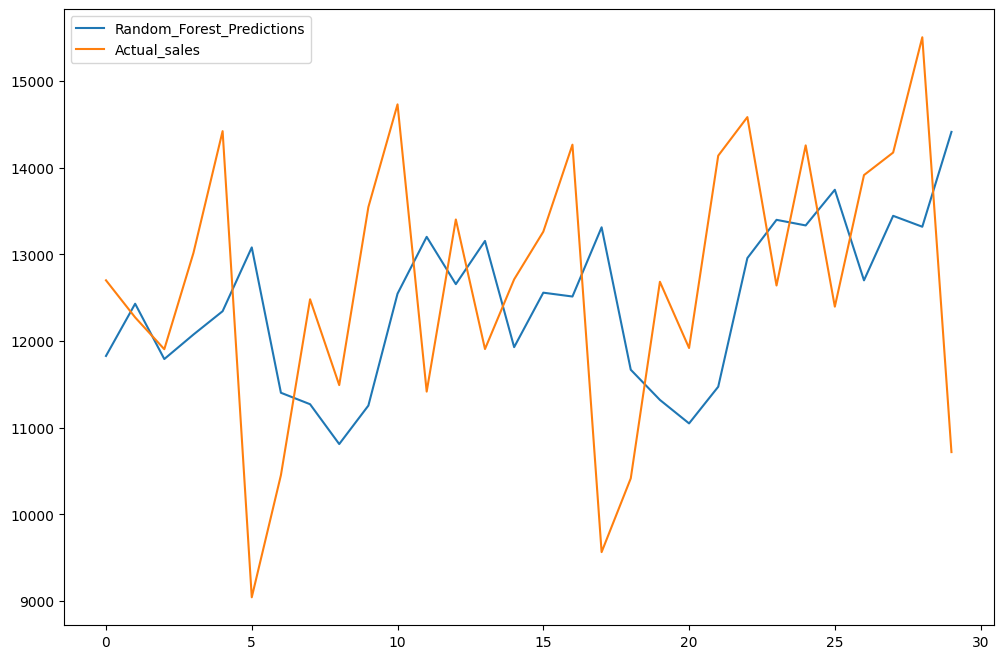

In [51]:
lin_pred= l_model.predict(x_test)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(lin_pred, label = "Random_Forest_Predictions")
plt.plot(y_test, label="Actual_sales")
plt.legend(loc="upper left")
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_rf = sqrt(mean_squared_error(pred, y_test))
rms_lr= sqrt(mean_squared_error(lin_pred, y_test))

In [53]:
print("mean Squared Error for Random Forest Model is: ", rms_rf)
print( 'Mean Squared Error for Linear Regression Model is: ', rms_rf)

mean Squared Error for Random Forest Model is:  1913.7762399350665
Mean Squared Error for Linear Regression Model is:  1913.7762399350665
